In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [ ]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.



missing_Value = df.isnull().sum()
missing_Value

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


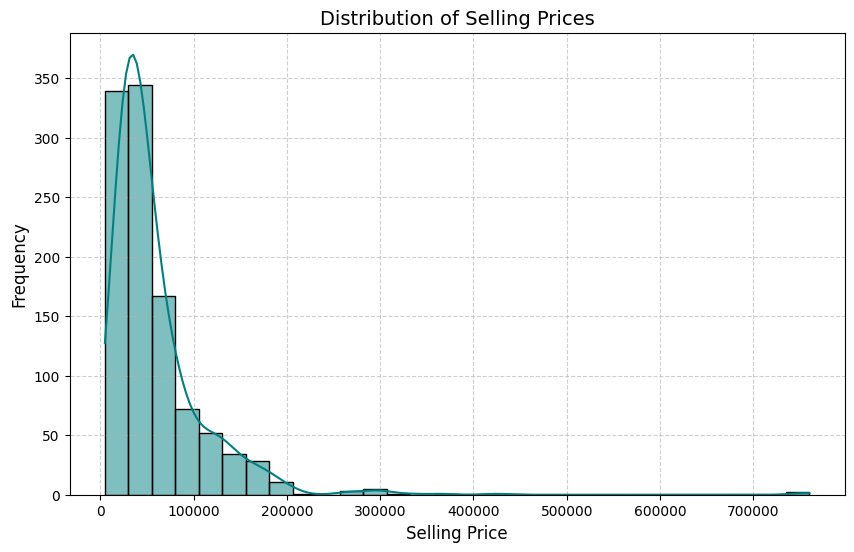

In [ ]:
#  Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


plt.figure(figsize=(10,6))
sns.histplot(data=df, x='selling_price', bins=30, kde=True, color='teal')

plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

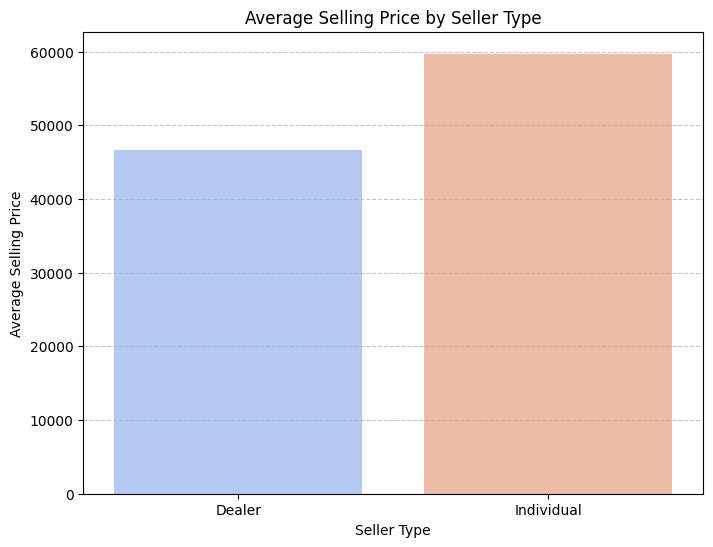

In [ ]:
#  Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()


plt.figure(figsize=(8,6))
sns.barplot(data=avg_price, x='seller_type', y='selling_price', palette='coolwarm')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

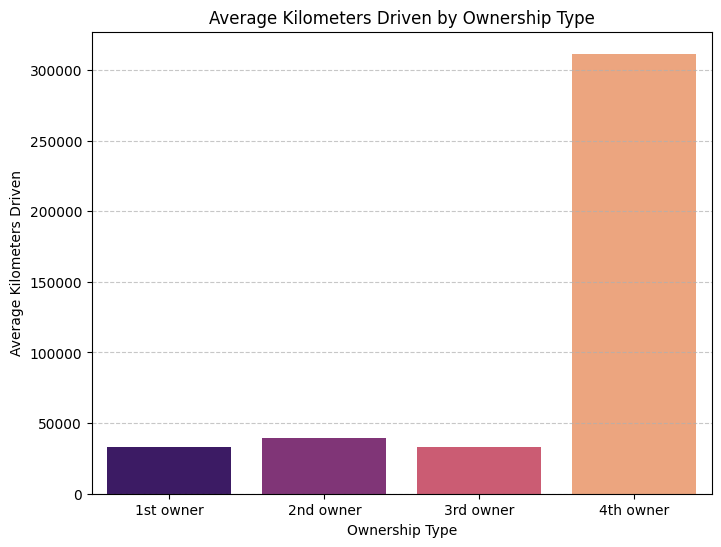

In [ ]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_km_by_owner, x='owner', y='km_driven', palette='magma')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


print("Before removing outliers:")
print(df['km_driven'].describe())
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("\nAfter removing outliers:")
print(df_filtered['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


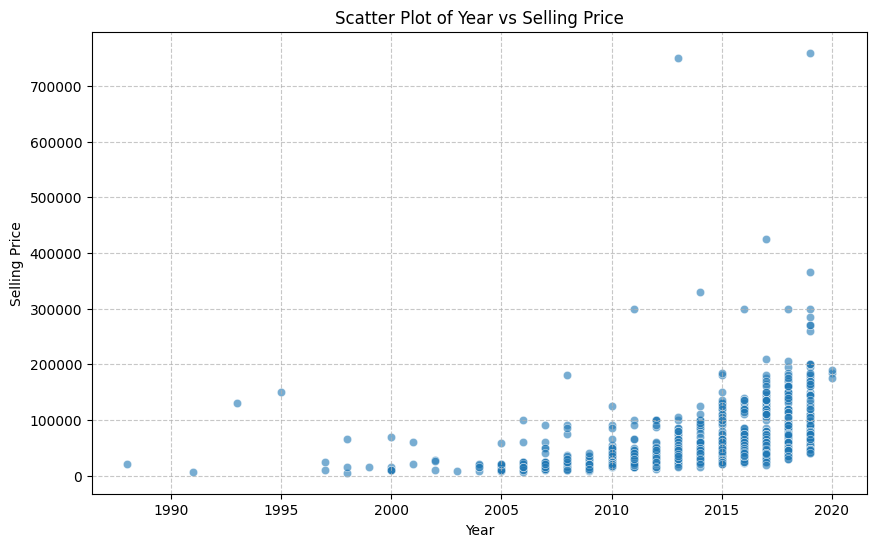

In [ ]:
#  Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)

plt.title("Scatter Plot of Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#  Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix=['seller'])
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


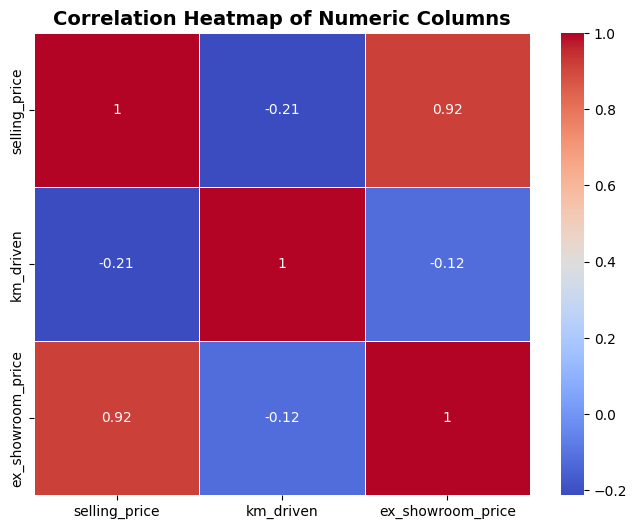

In [ ]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Question 10: Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.


print("## Analysis Report\n")

print("### Factors Affecting Bike Selling Price\n")
print("Based on the correlation heatmap and scatter plot, the most important factor affecting a bike's selling price appears to be the **ex_showroom_price**. There is a strong positive correlation (0.92) between the ex-showroom price and the selling price, indicating that bikes with a higher original price tend to have a higher selling price in the used market.")
print("\nWhile the **year** of the bike shows a general trend of higher selling prices for newer bikes (as seen in the scatter plot), the correlation is not as strong as the ex-showroom price.")
print("\nThe **km_driven** has a negative correlation (-0.21) with the selling price, suggesting that bikes with more kilometers driven tend to have lower selling prices, but this relationship is not as strong as the ex-showroom price.")
print("\nThe **seller_type** also seems to have an impact on the selling price, with Individual sellers having a slightly higher average selling price compared to Dealers (as seen in the bar plot).")


print("\n### Data Cleaning and Feature Engineering\n")
print("- **Missing Values:** We checked for missing values in the dataset and found that the 'ex_showroom_price' column has a significant number of missing values (435). We did not impute or remove these in this analysis, but this would be a necessary step for building a predictive model.")
print("- **Outlier Detection and Removal:** We used the IQR method to detect and remove outliers from the 'km_driven' column. This step helped to get a more representative distribution of kilometers driven by removing extreme values.")
print("- **One-Hot Encoding:** We converted the 'seller_type' categorical column into a numerical format using one-hot encoding. This is a common feature engineering technique to prepare categorical data for machine learning models.")

## Analysis Report

### Factors Affecting Bike Selling Price

Based on the correlation heatmap and scatter plot, the most important factor affecting a bike's selling price appears to be the **ex_showroom_price**. There is a strong positive correlation (0.92) between the ex-showroom price and the selling price, indicating that bikes with a higher original price tend to have a higher selling price in the used market.

While the **year** of the bike shows a general trend of higher selling prices for newer bikes (as seen in the scatter plot), the correlation is not as strong as the ex-showroom price.

The **km_driven** has a negative correlation (-0.21) with the selling price, suggesting that bikes with more kilometers driven tend to have lower selling prices, but this relationship is not as strong as the ex-showroom price.

The **seller_type** also seems to have an impact on the selling price, with Individual sellers having a slightly higher average selling price compared to Dealers (as s

#Mention any data cleaning or feature engineering you performed.

I have already included the data cleaning and feature engineering steps in the report I generated in the previous turn. To reiterate, I performed the following steps:

1. Missing Values: I checked for missing values in the dataset and found that the 'ex_showroom_price' column has a significant number of missing values (435). I noted that these were not handled in this analysis but would be necessary for building a predictive model.

2. Outlier Detection and Removal: I used the IQR method to detect and remove outliers from the 'km_driven' column to get a more representative distribution.

3. One-Hot Encoding: I converted the 'seller_type' categorical column into a numerical format using one-hot encoding to prepare it for machine learning models